In [32]:
# importing libraries
from cgitb import small
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
import statsmodels.api as sm

data = pd.read_csv('njmin3.csv')
data.describe()

,NJ,POST_APRIL92,NJ_POST_APRIL92,fte,bk,kfc,roys,wendys,co_owned,centralj,southj,pa1,pa2,demp
count,820.000000,820.000000,820.000000,794.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,768.000000
mean,0.807317,0.500000,0.403659,21.026511,0.417073,0.195122,0.241463,0.146341,0.343902,0.153659,0.226829,0.087805,0.104878,-0.070443
std,0.394647,0.500305,0.490930,9.422746,0.493376,0.396536,0.428232,0.353664,0.475299,0.360841,0.419037,0.283184,0.306583,9.016441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-41.500000
25%,1.000000,0.000000,0.000000,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
50%,1.000000,0.500000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,25.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000


In [7]:
data.isnull().any()

NJ                 False
POST_APRIL92       False
NJ_POST_APRIL92    False
fte                 True
bk                 False
kfc                False
roys               False
wendys             False
co_owned           False
centralj           False
southj             False
pa1                False
pa2                False
demp                True
dtype: bool

In [14]:
# imputing NA values

imputer = SimpleImputer()


In [16]:
data_cleaned = imputer.fit_transform(data)
data_cleaned = pd.DataFrame(data_cleaned, columns=data.columns)
data_cleaned.isnull().any()

NJ                 False
POST_APRIL92       False
NJ_POST_APRIL92    False
fte                False
bk                 False
kfc                False
roys               False
wendys             False
co_owned           False
centralj           False
southj             False
pa1                False
pa2                False
demp               False
dtype: bool

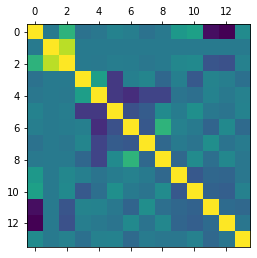

In [21]:
plt.matshow(data_cleaned.corr())

In [39]:
# create features and target variable
X = data_cleaned.iloc[:,:3].values
y = data_cleaned[['fte']].values

In [40]:
print(X.shape)
print(y.shape)

(820, 3)
(820, 1)


In [42]:
# adding a constant to allow a regression
X = sm.add_constant(X)

# fitting
model1 = sm.OLS(y, X).fit()

# summary
model1.summary(yname = "FTE",
               xname = ("intercept", "New Jersey", "After April 1992",
                        "New Jersey and after April 1992"))

c:\Users\lapen\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FTE   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.974
Date:                Thu, 25 Aug 2022   Prob (F-statistic):              0.116
Time:                        13:54:06   Log-Likelihood:                -2986.2
No. Observations:                 820   AIC:                             5980.
Df Residuals:                     816   BIC:                             5999.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept                          23.2728      1.041     22.349      0.000      21.229      25.317
New Jersey                         -2.8157      1.159     -2.430      0.015      -5.091      -0.541
After April 1992                   -2.1108      1.473     -1.433      0.152      -5.001       0.780
New Jersey and after April 1992     2.6810      1.639      1.636      0.102      -0.536       5.898
==============================================================================
Omnibus:                      232.659   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              908.337
Skew:                           1.289   Prob(JB):                    5.72e-198
Kurtosis:                       7.465   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
data_cleaned

,NJ,POST_APRIL92,NJ_POST_APRIL92,fte,bk,kfc,roys,wendys,co_owned,centralj,southj,pa1,pa2,demp
0,1.0,0.0,0.0,15.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.00
1,1.0,0.0,0.0,15.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.50
2,1.0,0.0,0.0,24.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.00
3,1.0,0.0,0.0,19.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.25
4,1.0,0.0,0.0,21.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.0,1.0,0.0,12.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-2.50
816,0.0,1.0,0.0,34.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16.00
817,0.0,1.0,0.0,10.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-10.25
818,0.0,1.0,0.0,14.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.50


P value is above 0.05 so we need more variables to explain the situation

In [57]:
# Adjust X for more variables
X = data_cleaned.loc[:,'NJ':'wendys'].drop(['fte', 'roys'], axis=1).values

#creating the second model
import statsmodels.api as sm
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
model2.summary(yname = "FTE",
               xname = ("intercept", "New Jersey", "After April 1992",
                        "New Jersey and after April 1992",
                        "Burger King", "KFC", "Wendy's"))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FTE   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     31.95
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           1.30e-34
Time:                        14:05:21   Log-Likelihood:                -2902.4
No. Observations:                 820   AIC:                             5819.
Df Residuals:                     813   BIC:                             5852.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept                          23.4055      1.085     21.575      0.000      21.276      25.535
New Jersey                         -2.2349      1.050     -2.129      0.034      -4.296      -0.174
After April 1992                   -2.1108      1.332     -1.585      0.113      -4.725       0.504
New Jersey and after April 1992     2.6810      1.482      1.809      0.071      -0.229       5.591
Burger King                         2.1620      0.748      2.891      0.004       0.694       3.630
KFC                                -8.4912      0.890     -9.540      0.000     -10.238      -6.744
Wendy's                             1.0496      0.970      1.082      0.280      -0.855       2.954
==============================================================================
Omnibus:                      300.626   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1848.909
Skew:                           1.530   Prob(JB):                         0.00
Kurtosis:                       9.690   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#isolating the X and Y variables part 2
X = data_cleaned.loc[:, ['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92',
                'bk', 'kfc', 'wendys',
                'co_owned', 'centralj', 'southj']].values

#creating the third model
import statsmodels.api as sm
X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
model3.summary(yname = "FTE",
               xname = ("intercept", "New Jersey", "After April 1992",
                        "New Jersey and after April 1992",
                        "Burger King", "KFC", "Wendy's",
                        "Co-owned", "Central J", "South J"))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FTE   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     24.89
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           6.45e-38
Time:                        14:07:21   Log-Likelihood:                -2889.1
No. Observations:                 820   AIC:                             5798.
Df Residuals:                     810   BIC:                             5845.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept                          23.9321      1.184     20.204      0.000      21.607      26.257
New Jersey                         -1.3009      1.078     -1.207      0.228      -3.416       0.815
After April 1992                   -2.1108      1.313     -1.608      0.108      -4.688       0.466
New Jersey and after April 1992     2.6810      1.461      1.835      0.067      -0.187       5.549
Burger King                         1.6653      0.832      2.002      0.046       0.033       3.298
KFC                                -8.2346      0.899     -9.161      0.000      -9.999      -6.470
Wendy's                             0.6218      1.017      0.612      0.541      -1.374       2.617
Co-owned                           -0.7456      0.699     -1.066      0.287      -2.118       0.627
Central J                           0.0030      0.867      0.003      0.997      -1.699       1.705
South J                            -3.5487      0.759     -4.674      0.000      -5.039      -2.058
==============================================================================
Omnibus:                      309.762   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1987.511
Skew:                           1.570   Prob(JB):                         0.00
Kurtosis:                       9.951   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""